<a href="https://colab.research.google.com/github/Nikhilprasad1010/BikeSharingDemandPrediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Bike Sharing Demand Prediction***

# ***Business Context***

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Understanding**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Dataset loading and Cleanup**

In [1]:
#importing the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bike_df=pd.read_csv('/content/drive/MyDrive/bike sharing prediction/SeoulBikeData.csv', encoding ='latin')

# **EDA**

In [4]:
#Viewing Top 5 Rows & Coloums
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Viewing Bottom 5 Rows & Coloums
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
print(bike_df.shape)
#There are total 8760 Rows & 14 Coloums in Dataset

(8760, 14)


In [7]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [10]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
#Checking Dublicated Values
len(bike_df[bike_df.duplicated()])
#There are 0 Dublicated Values in Entire Dataset

0

In [12]:
#Changing the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [13]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [14]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [15]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [16]:
bike_df.head()
#As seen, Year , Month & Day_name is added to the dataset.

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [17]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [18]:
#New Dataset
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [19]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [20]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

Since, Originally the Coloums 'Hour' , 'Month' & 'Weekdays_weekend' were in category datatype, so Lets convert them into the same type as if not done, this could be misleading Later in our Exploration.italicized text

In [21]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [22]:
#now, lets Check type of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

Univariate Analysis

Why do you do univariate analysis?

The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

Analysis of Dependent Variable: What is a dependent variable in data analysis?

we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.

Analysis of categorical variables : Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.

[Text(0.5, 1.0, 'Count of Rented bikes according to Month ')]

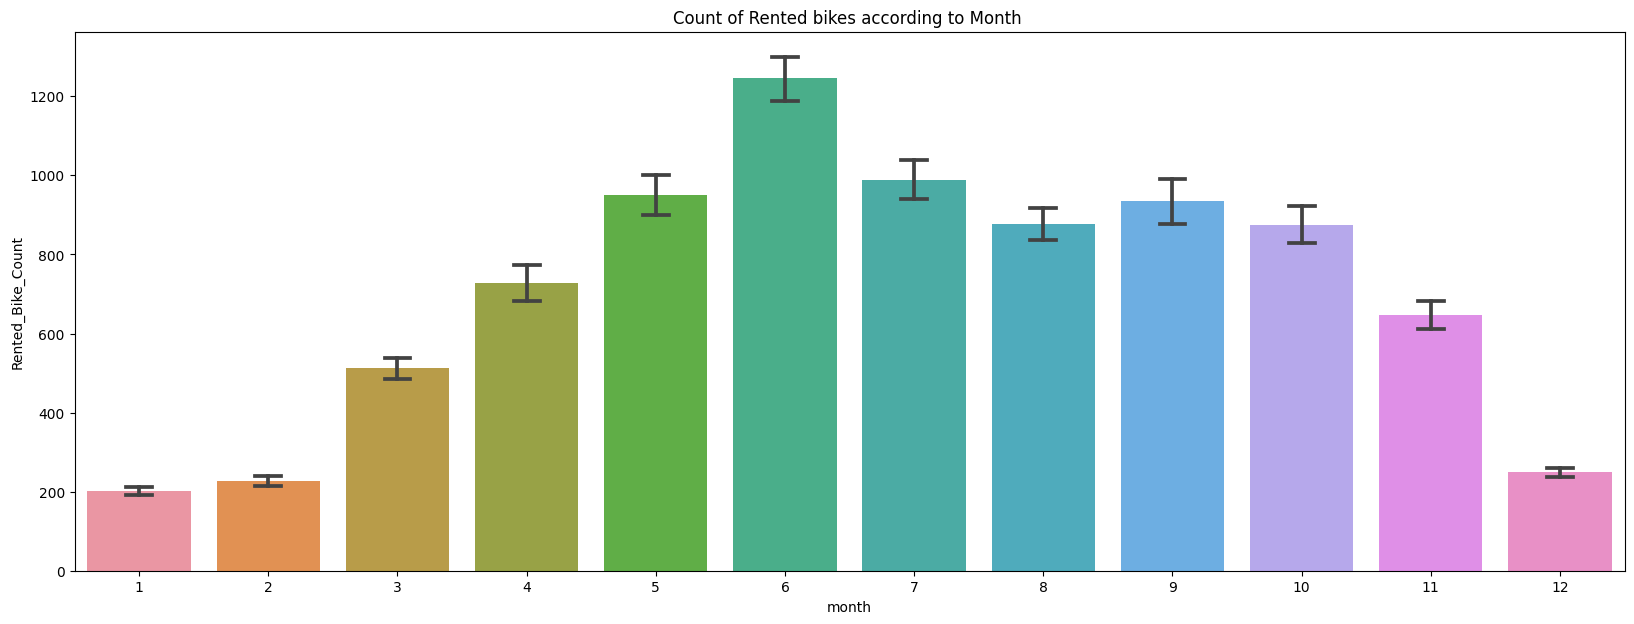

In [23]:
#Count of Rented bike according to Month
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Month ')

Interpretation : As seen, Month 6th ie : June has highest no. of shared bikes , followed by 6th month ie: july. Most of demand is in 5th to 10th month.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

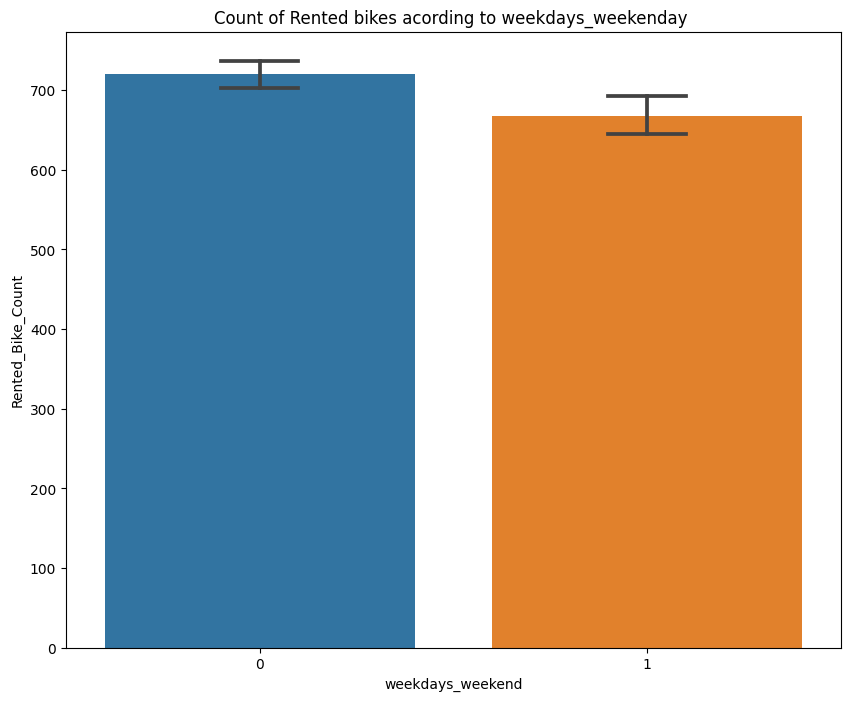

In [24]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

Interpretaion : As seen, Count of rented bike for weekdays are more compared to weekends ie: saturday- Sunday.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

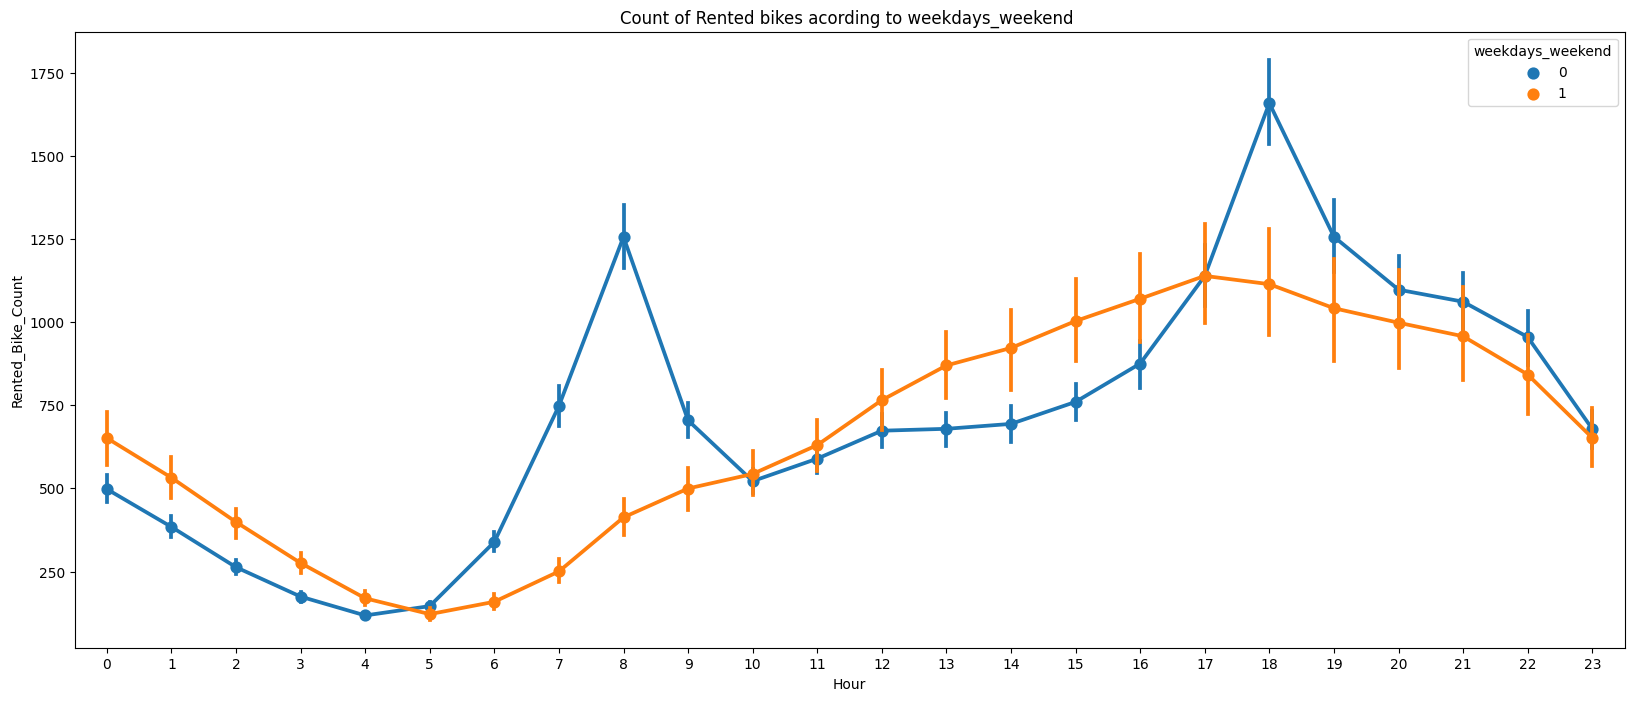

In [25]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

Interpretation : As seen , the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

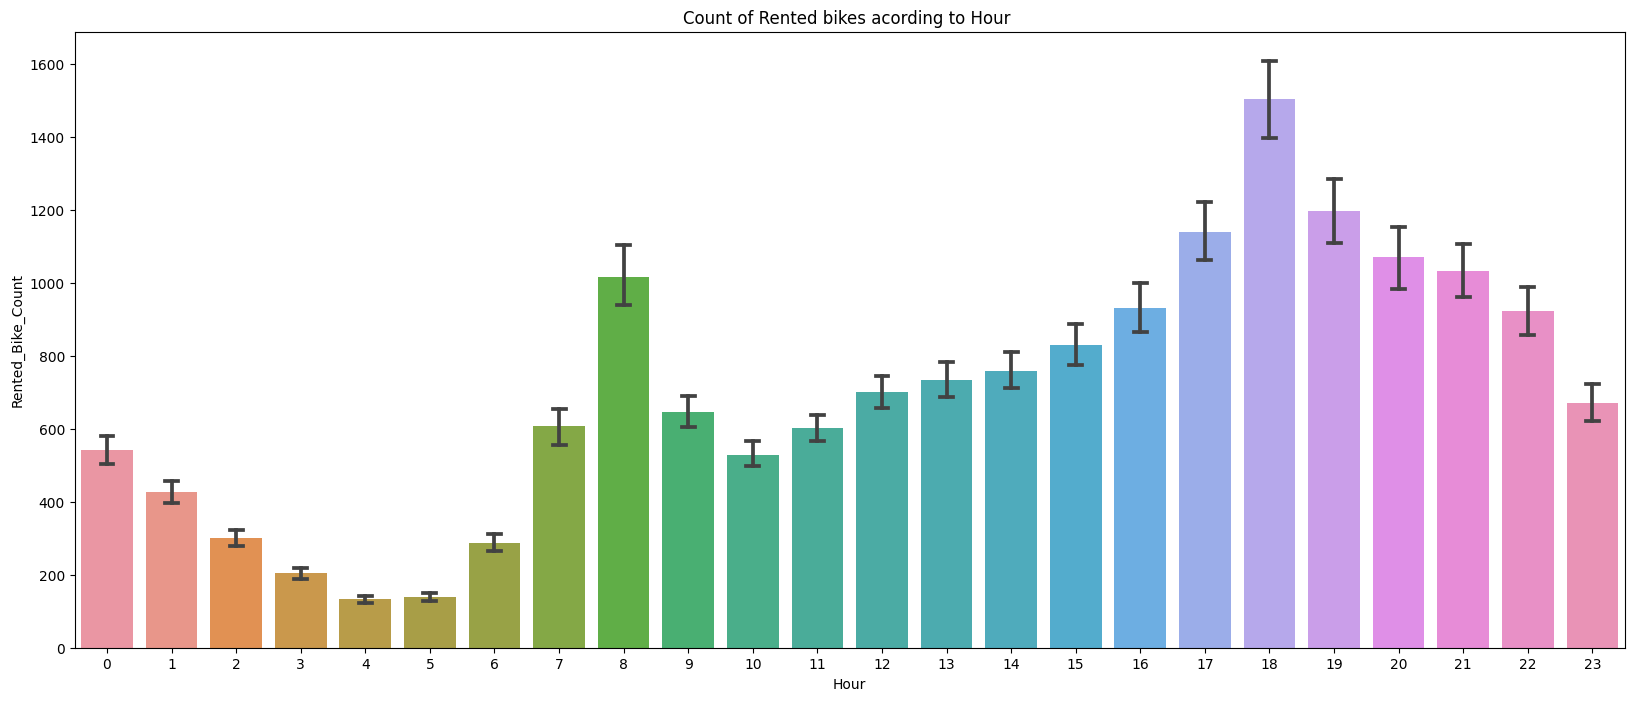

In [26]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

Interpretation : As seen from the above chart, there is increase in demand during morning office hours & eve 5pm to 8pm.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

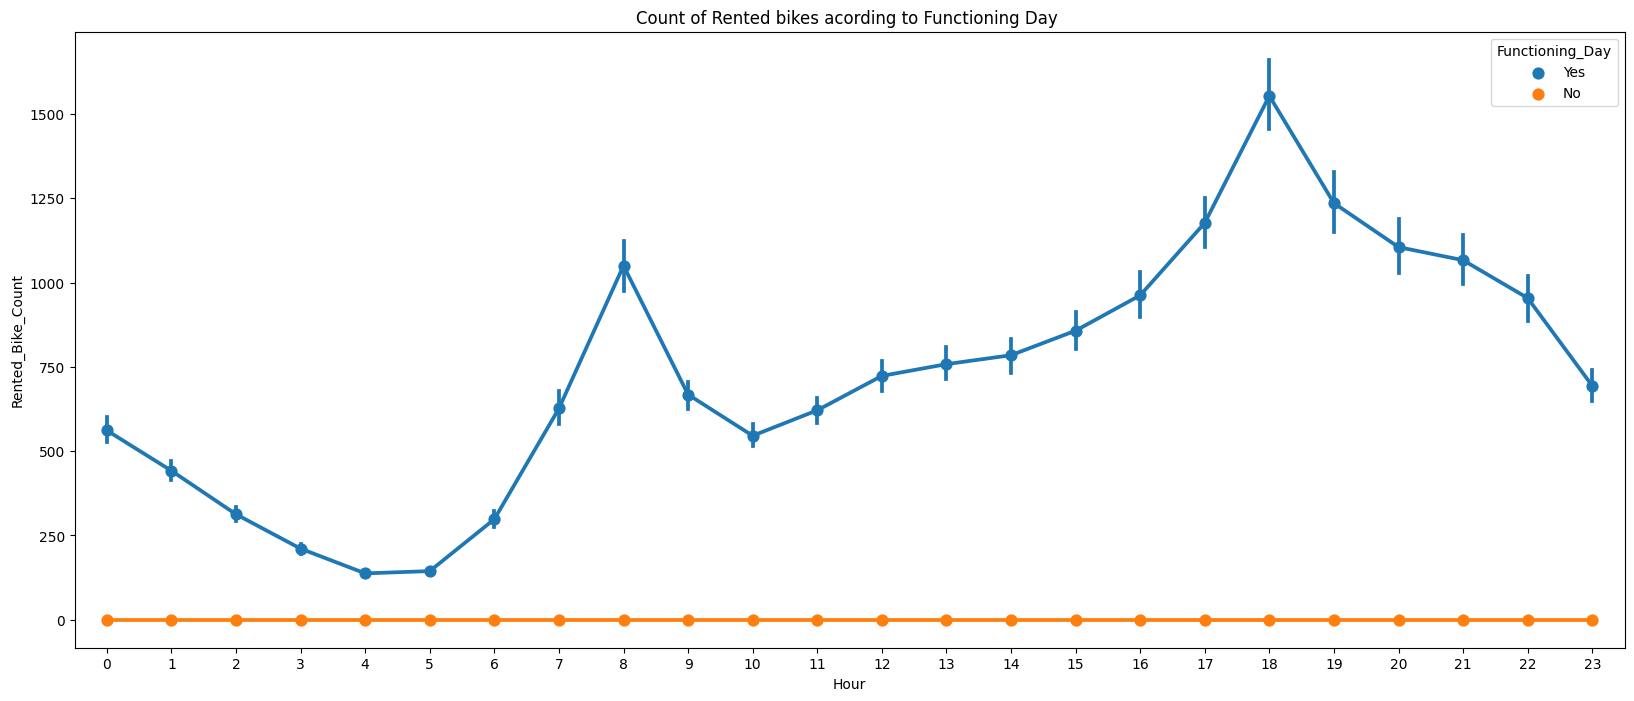

In [27]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

Interpretation : as seen, people dont use rented bikes on functioning days.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

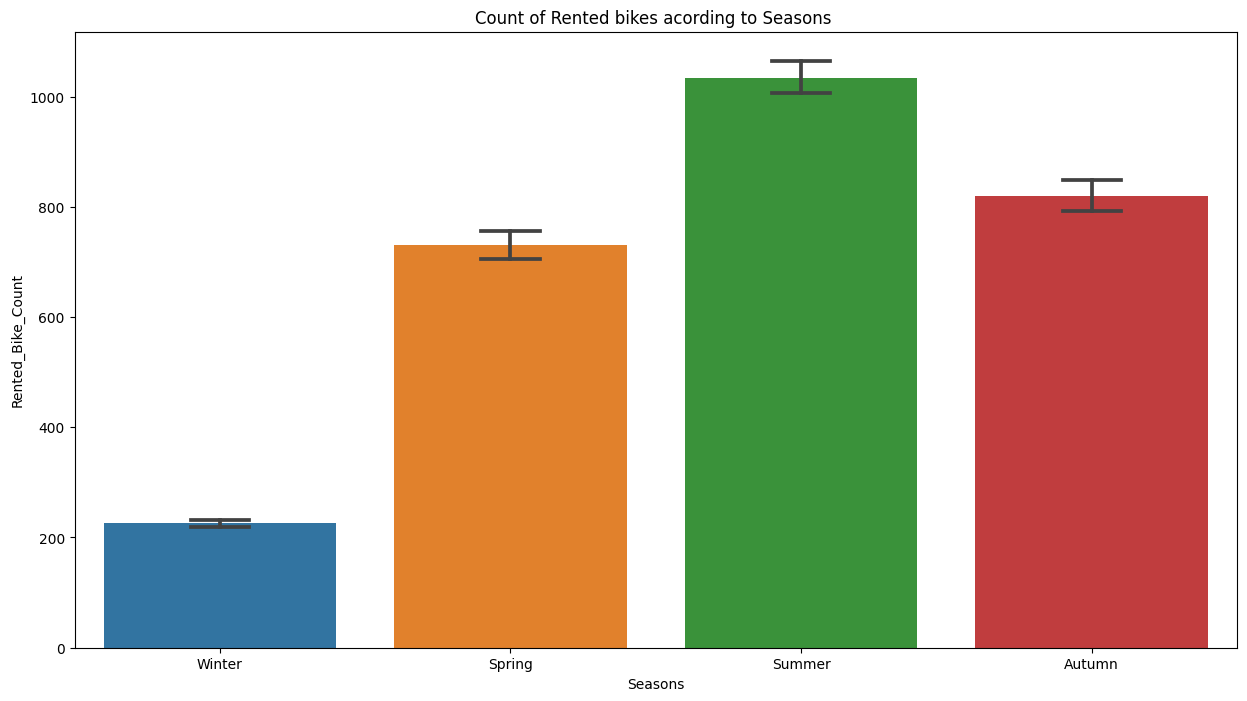

In [28]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

Interpretation : as seen, Summer season has the highest no of demand followed by Autumn & spring. Demand is lowest in Winter season.



[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

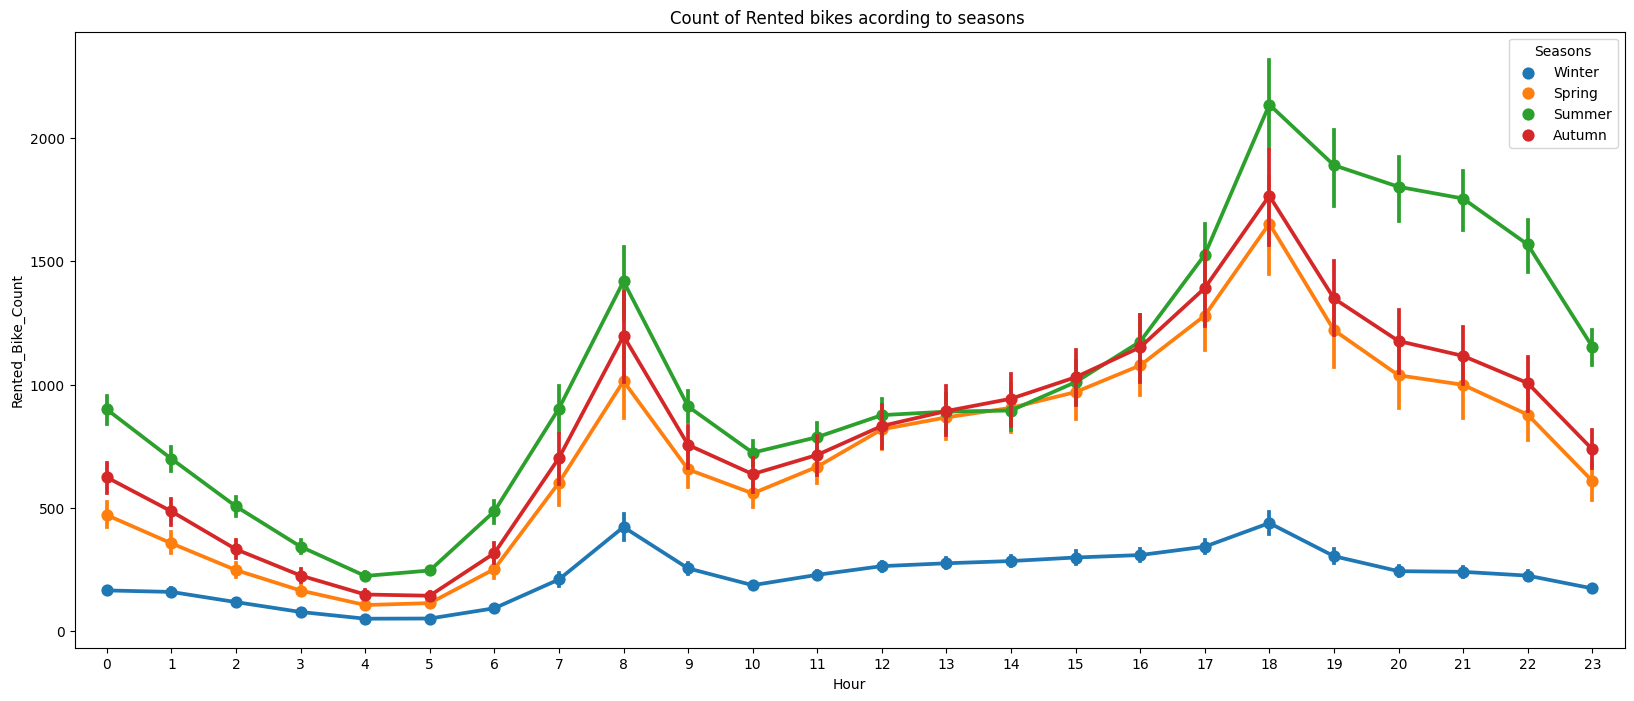

In [29]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

Interpretaion : In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that, In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm. In winter season the use of rented bike is very low because of snowfall.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

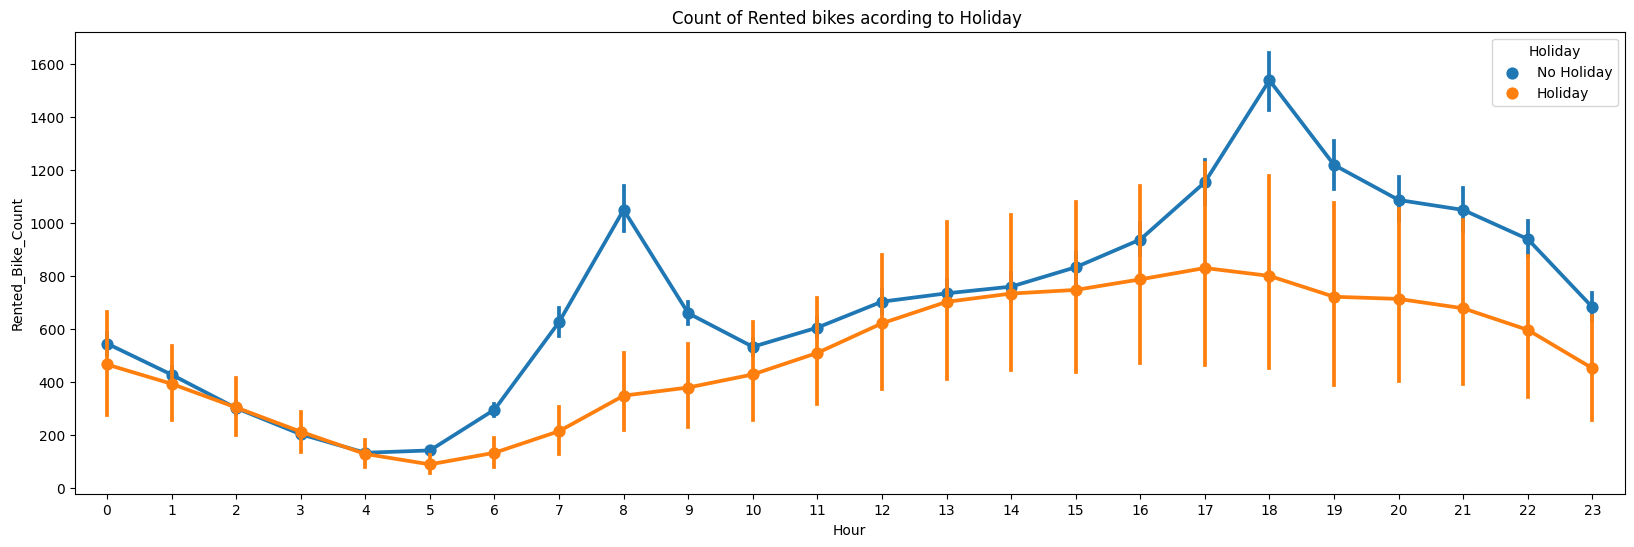

In [30]:
fig,ax=plt.subplots(figsize=(20,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

Interpretation : In the above point plot which shows the use of rented bike in a holiday, and it clearly shows that, plot shows that in holiday people uses the rented bike from 2pm-8pm

In [31]:
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

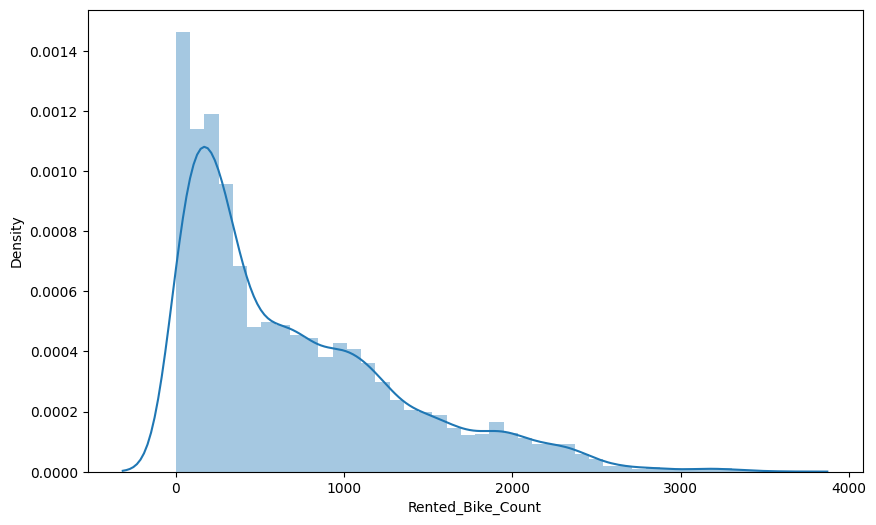

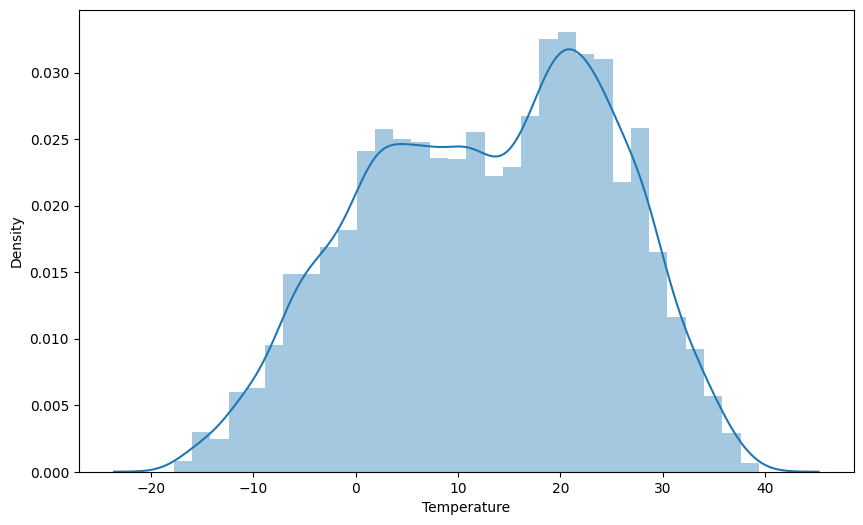

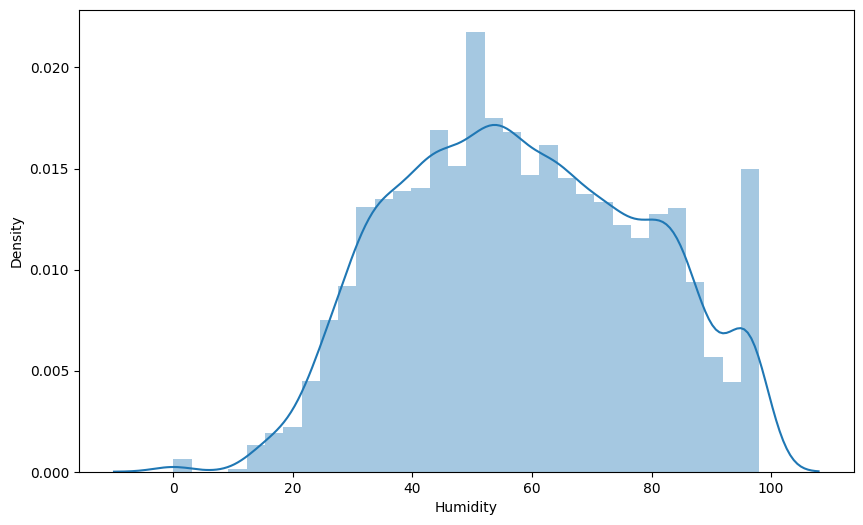

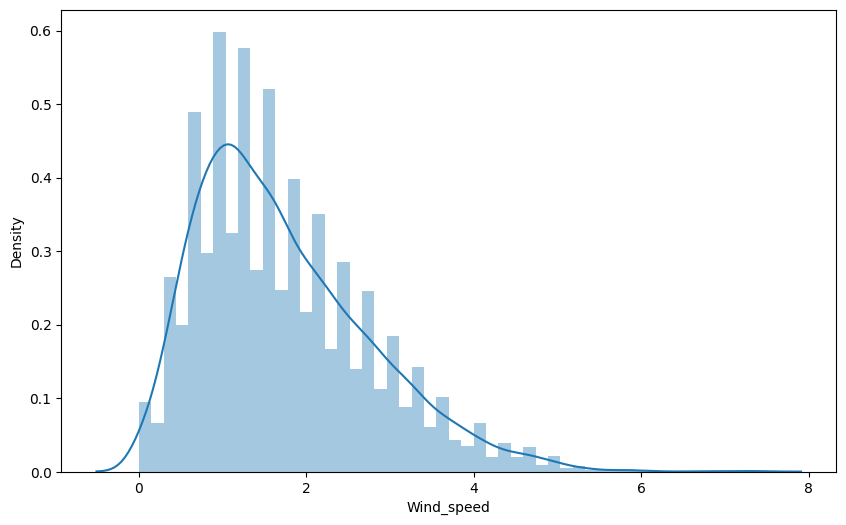

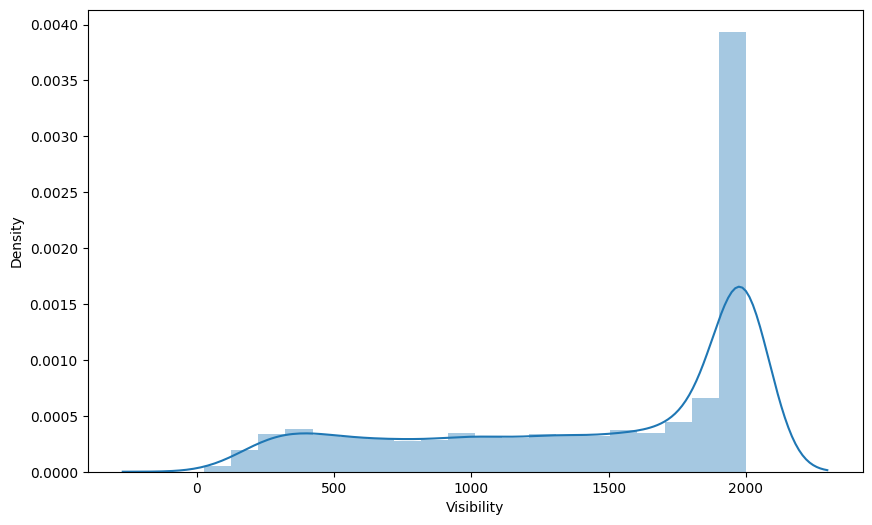

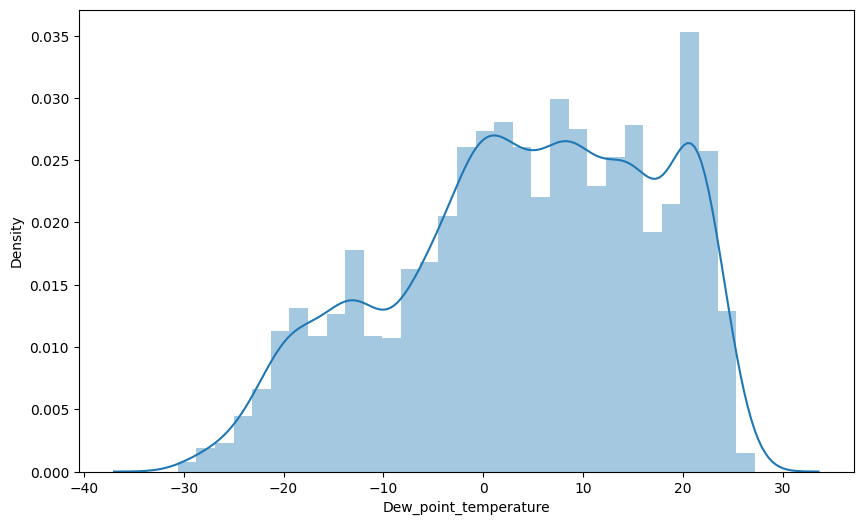

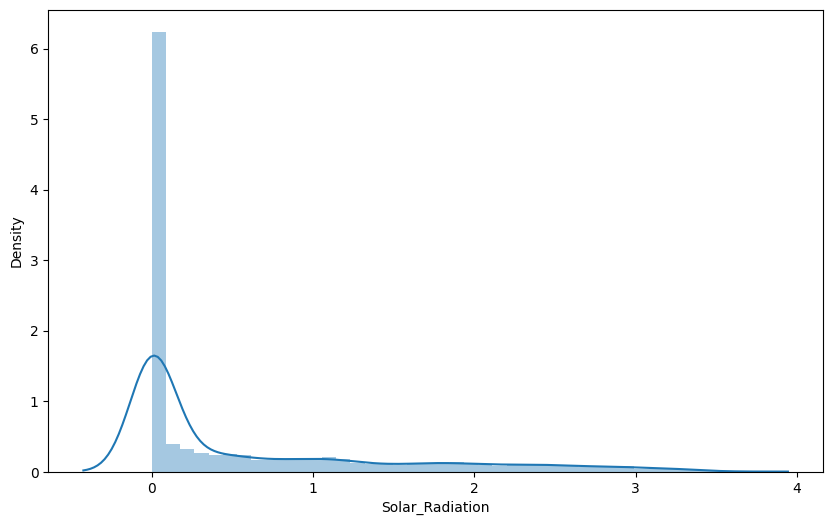

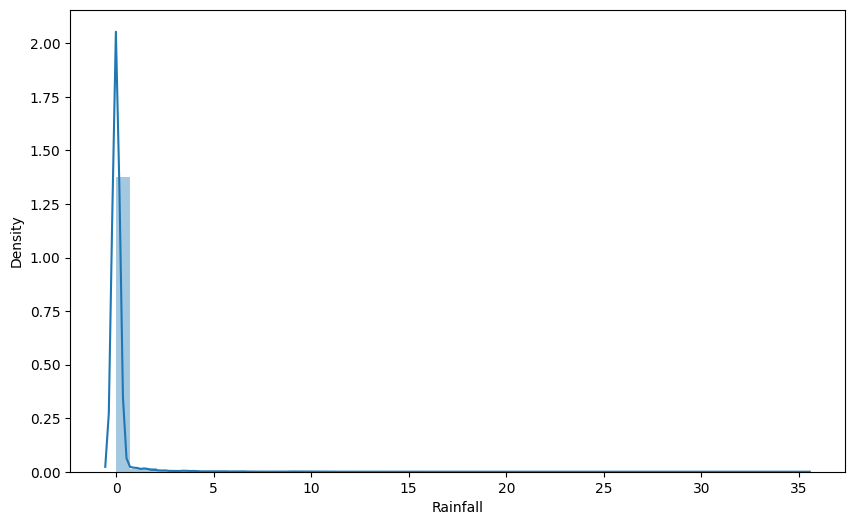

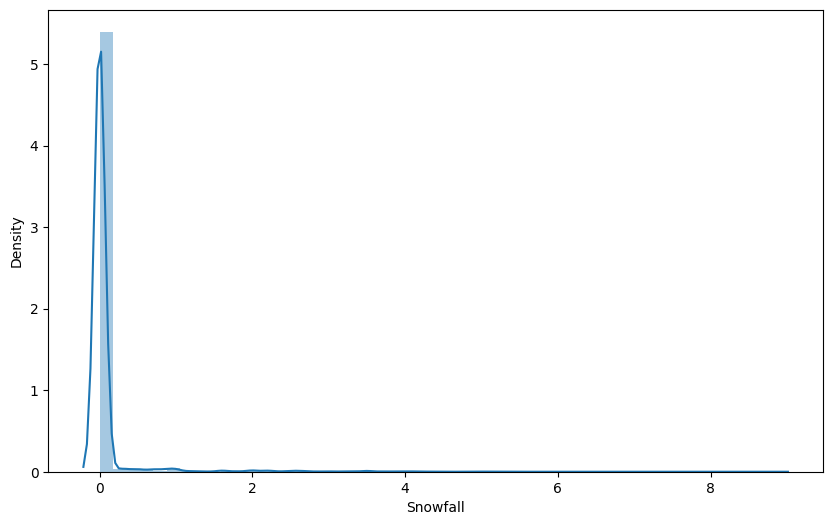

In [32]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

<Axes: xlabel='Temperature'>

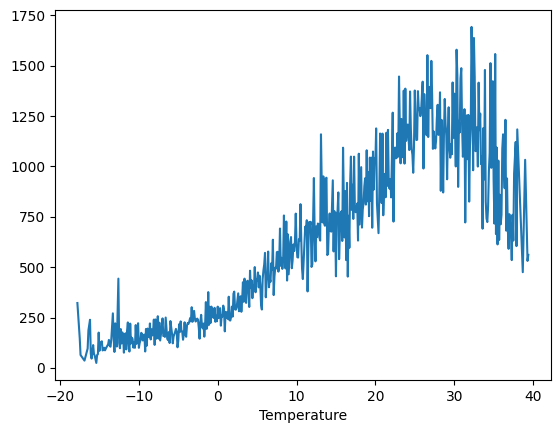

In [33]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

Interpretation : From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average.

<Axes: xlabel='Dew_point_temperature'>

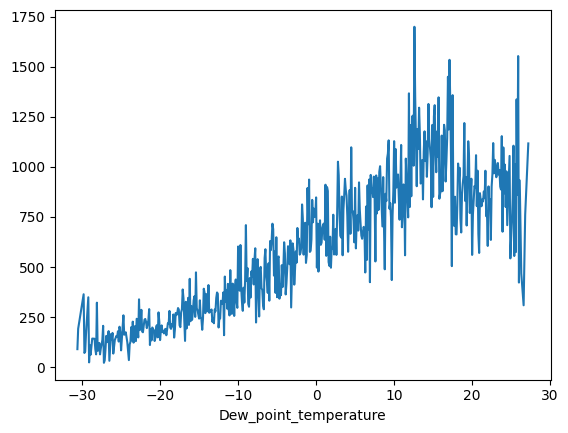

In [34]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Snowfall'>

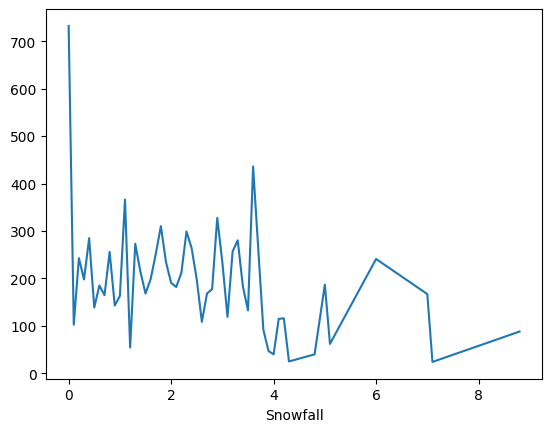

In [35]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

Interpretation : We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower.

<Axes: xlabel='Rainfall'>

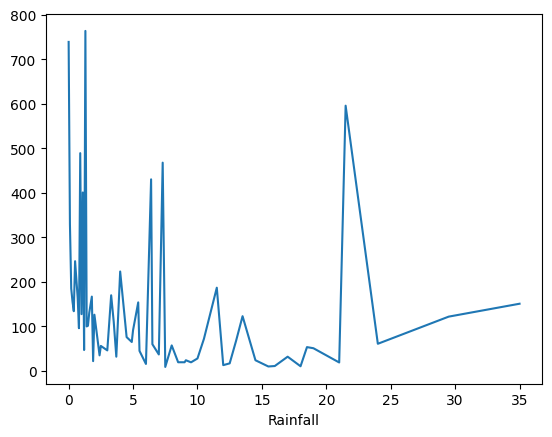

In [36]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

Interpretation : as seen, as the railfall increases there is decrease in demand, also , its highest when there is no or very less rainfall between 0-5cm.

<Axes: xlabel='Wind_speed'>

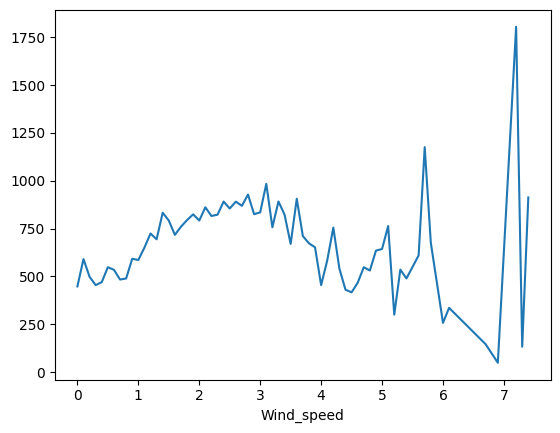

In [37]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

Interpretatin :We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increased.

REGRESSION ANALYSIS

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

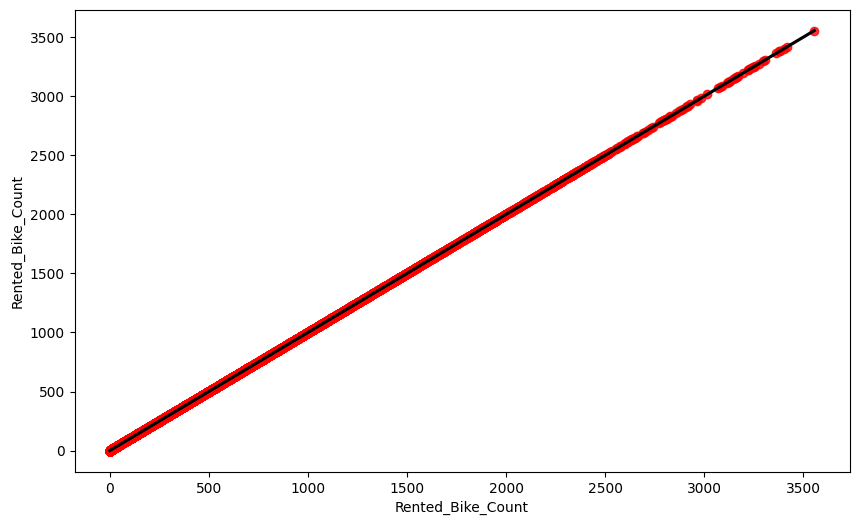

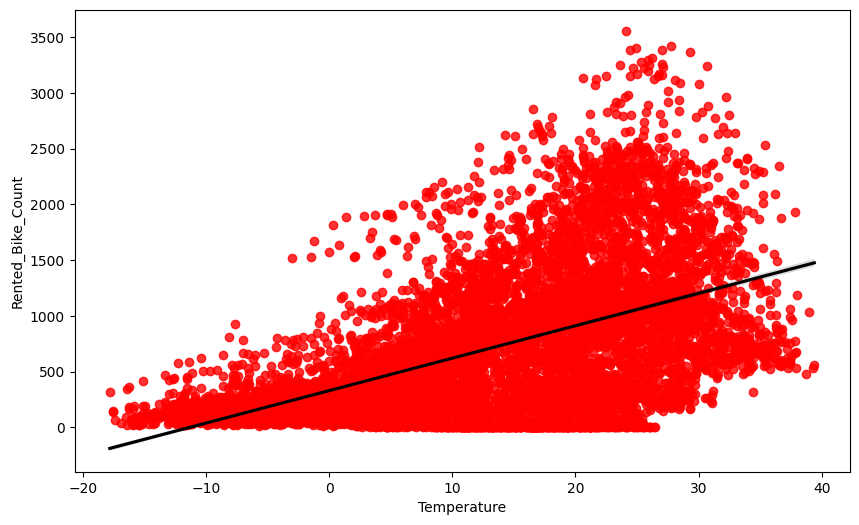

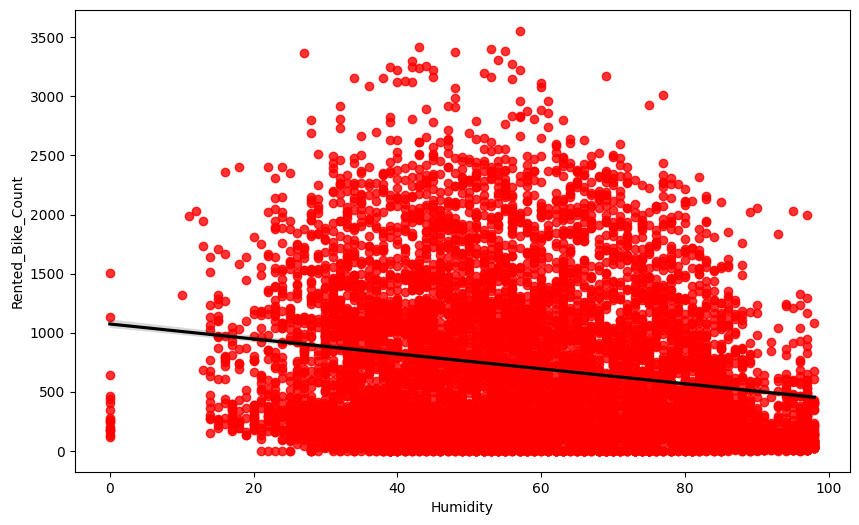

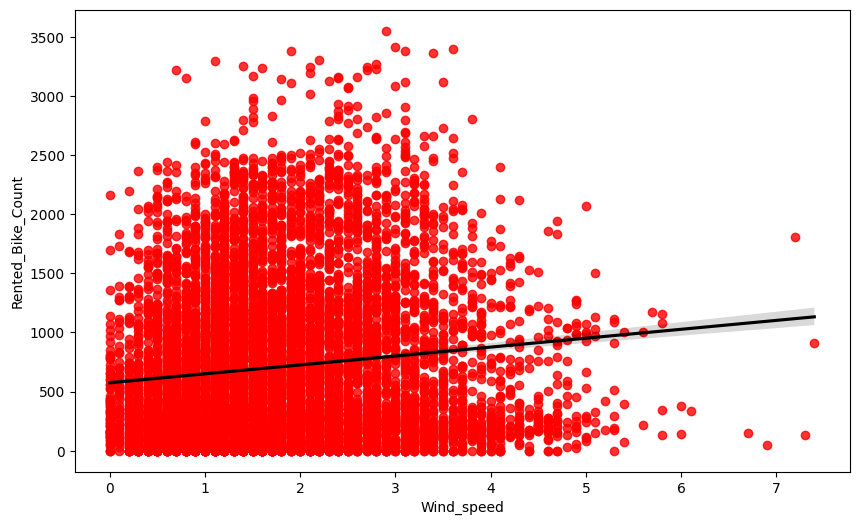

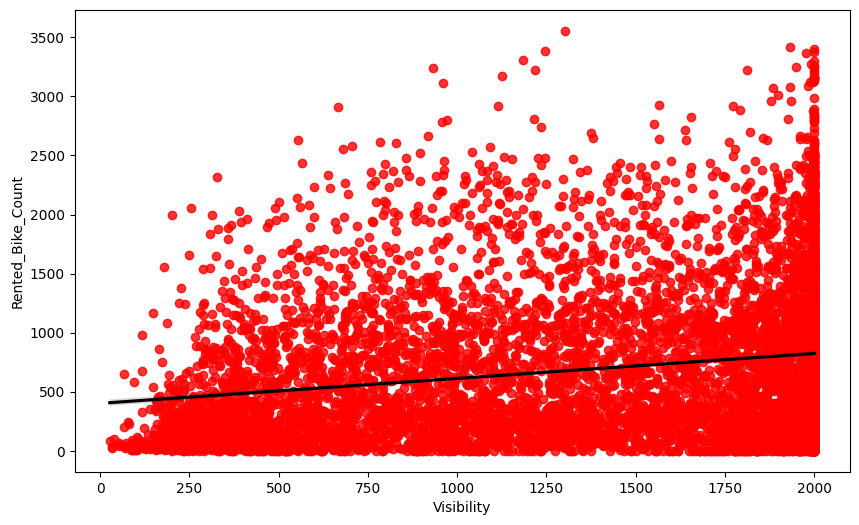

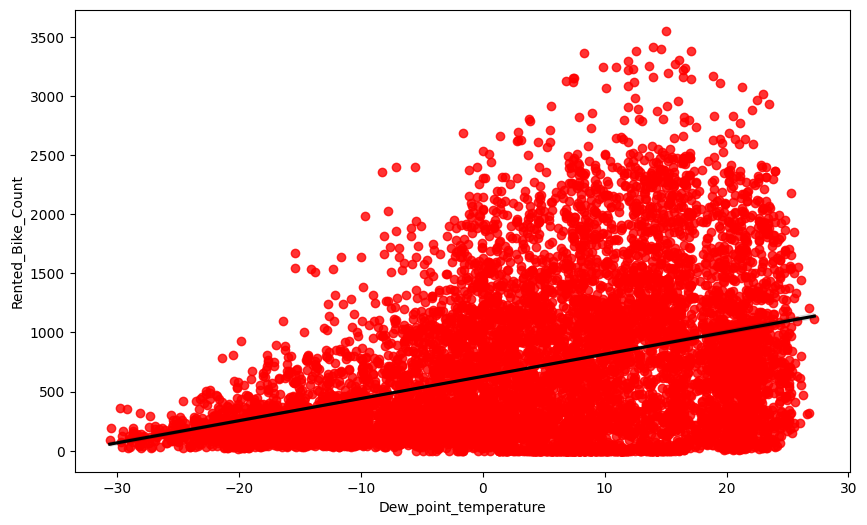

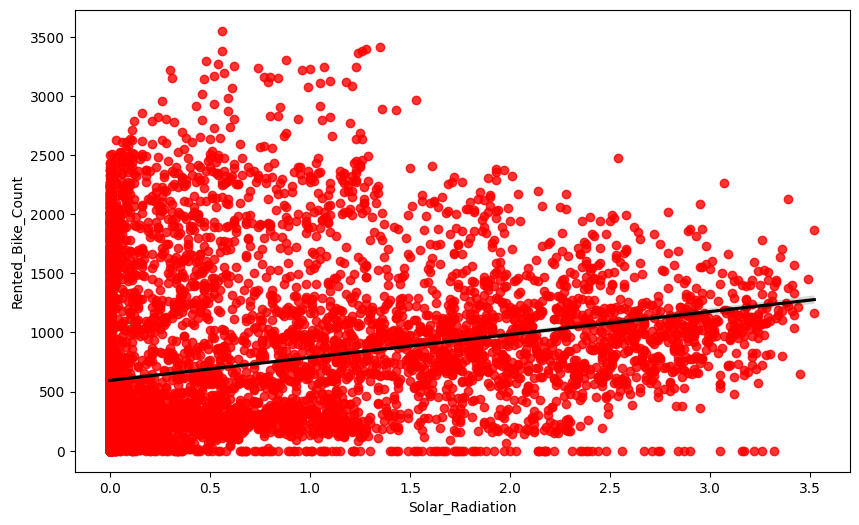

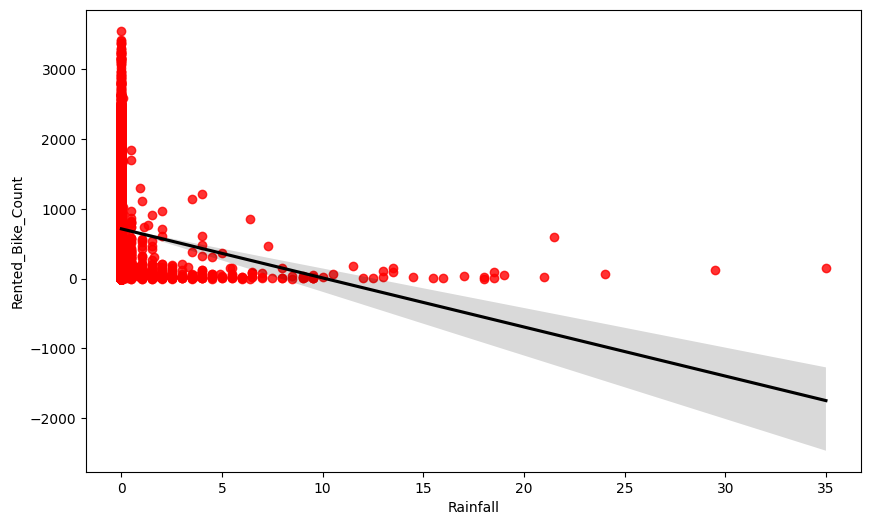

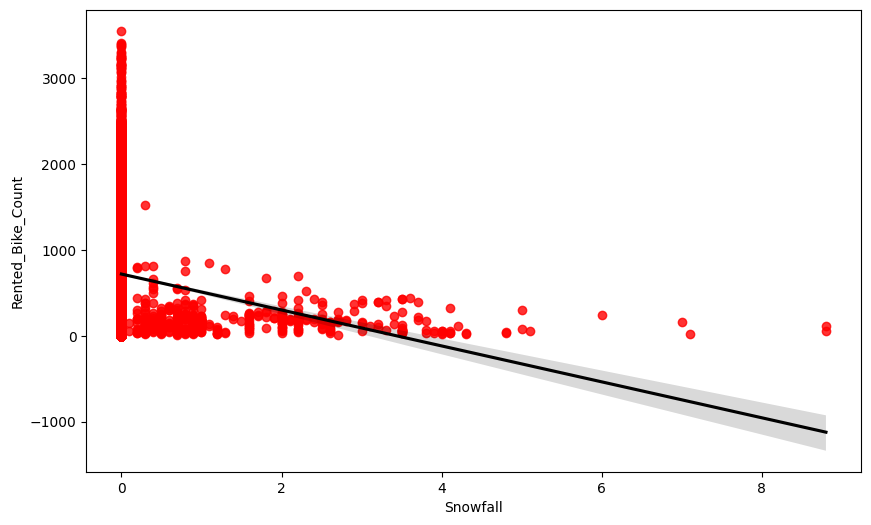

In [38]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'Red'}, line_kws={"color": "black"})

Interpretation : From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable. As seen , 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase

# Normalise Rented_Bike_Count column data

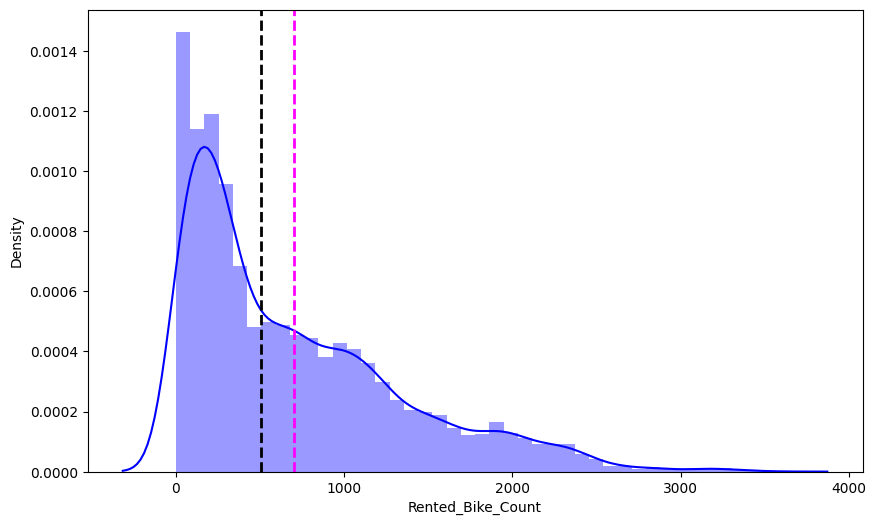

In [39]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="blue")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Interpretation : The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

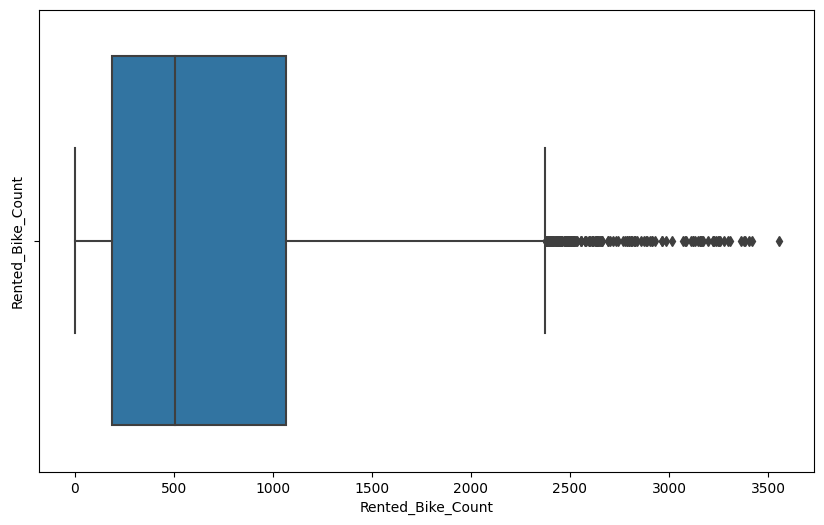

In [40]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

Interpretation : The above boxplot shows that we have detect outliers in Rented Bike Count column.

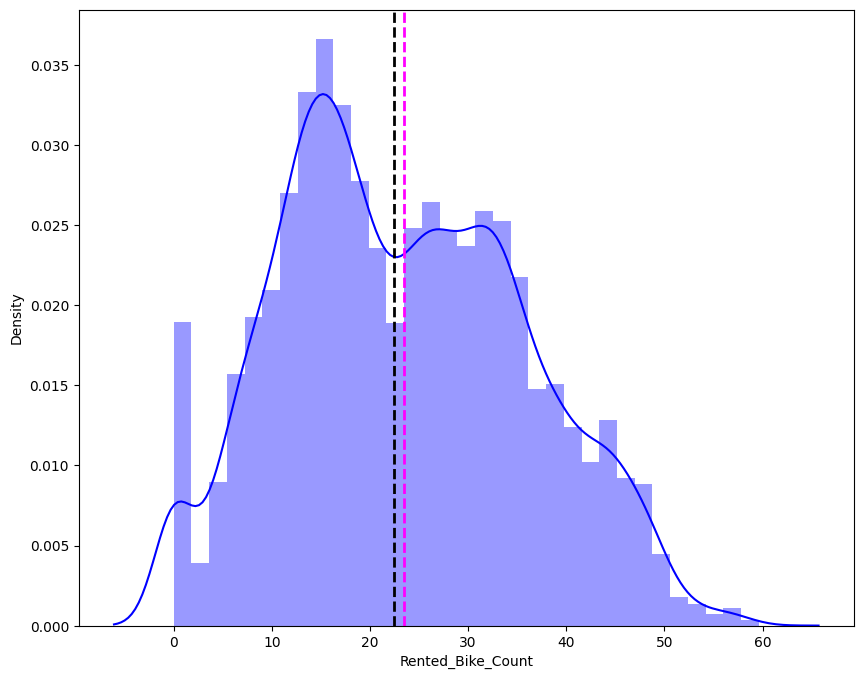

In [41]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="blue")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.



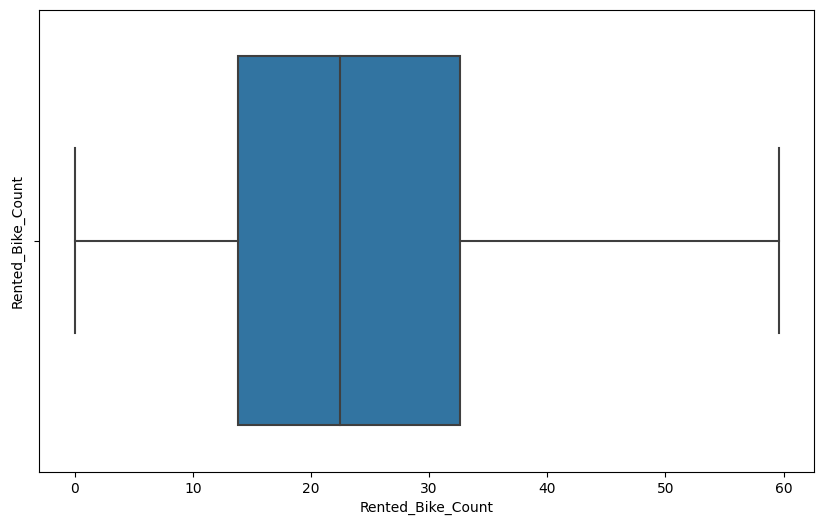

In [42]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# **Checking of Correlation between variables**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [43]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [44]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [45]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        11:20:34   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.R sqauare and Adj Square are near to each other. 40% of variance in the Rented
2.Bike count is explained by the model.
3.For F statistic , P value is less than 0.05 for 5% level of significance. P value of dew point temp and visibility are very high and they are not significant.

In [46]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000
